In [1]:
import sys, os, shutil
import numpy as np
sys.path.append("src")
from utilities.image_utilities import ImageUtils
from utilities.sorting import find_topk_unique
from utilities.plot_utilities import PlotUtils
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots

/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Read the classes

In [2]:
## classes.txt 
with open('food-101/meta/classes.txt') as f:
    classes = f.readlines()
classes = [x.strip() for x in classes]
#print(classes)      

# Resizing Images

In [3]:
IU = ImageUtils()

img_shape = (100, 100)  # force resize -> (ypixels, xpixels)

#Resize training images and store in the directory
IU.raw2resized_load_save(raw_dir='food-101/meta/small_train.txt',
                             processed_dir='train-images',
                             img_shape=img_shape)

#Resize test images and store in the directory
IU.raw2resized_load_save(raw_dir='food-101/meta/small_test.txt',
                             processed_dir='test-images',
                             img_shape=img_shape)

food-101/meta/small_train.txt
[1/200] Resized and saved to 'train-images/apple_pie:1005649_resized.jpg'...
[2/200] Resized and saved to 'train-images/apple_pie:1014775_resized.jpg'...
[3/200] Resized and saved to 'train-images/apple_pie:1026328_resized.jpg'...
[4/200] Resized and saved to 'train-images/apple_pie:1028787_resized.jpg'...
[5/200] Resized and saved to 'train-images/apple_pie:1043283_resized.jpg'...
[6/200] Resized and saved to 'train-images/apple_pie:1050519_resized.jpg'...
[7/200] Resized and saved to 'train-images/apple_pie:1057749_resized.jpg'...
[8/200] Resized and saved to 'train-images/apple_pie:1057810_resized.jpg'...
[9/200] Resized and saved to 'train-images/apple_pie:1072416_resized.jpg'...
[10/200] Resized and saved to 'train-images/apple_pie:1074856_resized.jpg'...
[11/200] Resized and saved to 'train-images/apple_pie:1074942_resized.jpg'...
[12/200] Resized and saved to 'train-images/apple_pie:1076891_resized.jpg'...
[13/200] Resized and saved to 'train-images

/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


[28/200] Resized and saved to 'train-images/baby_back_ribs:1062026_resized.jpg'...
[29/200] Resized and saved to 'train-images/baby_back_ribs:1062097_resized.jpg'...
[30/200] Resized and saved to 'train-images/baby_back_ribs:1070017_resized.jpg'...
[31/200] Resized and saved to 'train-images/baby_back_ribs:1073370_resized.jpg'...
[32/200] Resized and saved to 'train-images/baby_back_ribs:1078506_resized.jpg'...
[33/200] Resized and saved to 'train-images/baby_back_ribs:1078518_resized.jpg'...
[34/200] Resized and saved to 'train-images/baby_back_ribs:1079522_resized.jpg'...
[35/200] Resized and saved to 'train-images/baby_back_ribs:1081312_resized.jpg'...
[36/200] Resized and saved to 'train-images/baby_back_ribs:108211_resized.jpg'...
[37/200] Resized and saved to 'train-images/baby_back_ribs:1083903_resized.jpg'...
[38/200] Resized and saved to 'train-images/baby_back_ribs:1084769_resized.jpg'...
[39/200] Resized and saved to 'train-images/baby_back_ribs:1085337_resized.jpg'...
[40/2

[153/200] Resized and saved to 'train-images/bibimbap:1053624_resized.jpg'...
[154/200] Resized and saved to 'train-images/bibimbap:1054356_resized.jpg'...
[155/200] Resized and saved to 'train-images/bibimbap:1055297_resized.jpg'...
[156/200] Resized and saved to 'train-images/bibimbap:1062472_resized.jpg'...
[157/200] Resized and saved to 'train-images/bibimbap:1063704_resized.jpg'...
[158/200] Resized and saved to 'train-images/bibimbap:1063886_resized.jpg'...
[159/200] Resized and saved to 'train-images/bibimbap:1066987_resized.jpg'...
[160/200] Resized and saved to 'train-images/bibimbap:1080886_resized.jpg'...
[161/200] Resized and saved to 'train-images/bread_pudding:1004499_resized.jpg'...
[162/200] Resized and saved to 'train-images/bread_pudding:1004540_resized.jpg'...
[163/200] Resized and saved to 'train-images/bread_pudding:1006034_resized.jpg'...
[164/200] Resized and saved to 'train-images/bread_pudding:100939_resized.jpg'...
[165/200] Resized and saved to 'train-images/

# Splitting the training data
Use ratio 80/20

In [4]:
#Load training images to memory (resizes when necessary)
X_train, y_train, all_filenames = \
    IU.raw2resizednorm_load_classify(raw_dir='train-images', classes=classes, img_shape=img_shape)
print("\nAll data:")
print(" X_train.shape = {0}\n".format(X_train.shape))
print(" y_train.shape = {0}\n".format(y_train.shape))
print(y_train)

#Data-splitting parameters
ratio_train_test = 0.8
seed = 100

# Split images to training and validation set
X_train, X_val, y_train, y_val, index_train, index_test = \
    IU.split_train_test_classify(X_train, y_train, ratio_train_test, seed)
print("\nSplit data:")
print("X_train.shape = {0}".format(X_train.shape))
print("X_val.shape = {0}\n".format(X_val.shape))
print("y_train.shape = {0}".format(y_train.shape))
print("y_val.shape = {0}\n".format(y_val.shape))

[1/200] Loaded and processed 'train-images/apple_pie:1050519_resized.jpg'...
[2/200] Loaded and processed 'train-images/beet_salad:1006123_resized.jpg'...
[3/200] Loaded and processed 'train-images/beef_tartare:1098504_resized.jpg'...
[4/200] Loaded and processed 'train-images/beef_tartare:1009672_resized.jpg'...
[5/200] Loaded and processed 'train-images/beef_carpaccio:1039955_resized.jpg'...
[6/200] Loaded and processed 'train-images/baklava:1080762_resized.jpg'...
[7/200] Loaded and processed 'train-images/baklava:1042057_resized.jpg'...
[8/200] Loaded and processed 'train-images/baklava:1075078_resized.jpg'...
[9/200] Loaded and processed 'train-images/breakfast_burrito:1048412_resized.jpg'...
[10/200] Loaded and processed 'train-images/breakfast_burrito:108659_resized.jpg'...
[11/200] Loaded and processed 'train-images/beef_tartare:1037894_resized.jpg'...
[12/200] Loaded and processed 'train-images/baklava:1089062_resized.jpg'...
[13/200] Loaded and processed 'train-images/apple_p

# Convert to one hot encoding. Why?
Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

#### Reference : https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [5]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])
print("y_train_one_hot.shape = {0}".format(y_train_one_hot.shape))
print("y_val_one_hot.shape = {0}\n".format(y_val_one_hot.shape))

num_classes = y_train_one_hot.shape[1]
#print(num_classes)

Original label: 0.0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train_one_hot.shape = (165, 10)
y_val_one_hot.shape = (35, 10)



# Write the architecture for our model

We add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, we add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [6]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [7]:
food_model = Sequential()
food_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100, 100, 3)))
food_model.add(LeakyReLU(alpha=0.1))
food_model.add(MaxPooling2D((2, 2),padding='same'))
food_model.add(Dropout(0.25))
food_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
food_model.add(LeakyReLU(alpha=0.1))
food_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
food_model.add(Dropout(0.25))
food_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
food_model.add(LeakyReLU(alpha=0.1))                  
food_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
food_model.add(Dropout(0.4))
food_model.add(Flatten())
food_model.add(Dense(128, activation='linear'))
food_model.add(LeakyReLU(alpha=0.1))           
food_model.add(Dropout(0.3))
food_model.add(Dense(num_classes, activation='softmax'))

### https://keras.io/optimizers/

In [20]:
food_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=1e-3),metrics=['accuracy'])

In [21]:
food_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
__________

#### We use a batch size of 256 as using a higher batch size of 128 or 256 is preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy.

In [22]:
#Training parameters
n_epochs = 30
batch_size = 256

food_train = food_model.fit(X_train, y_train_one_hot, batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(X_val, y_val_one_hot))

Train on 165 samples, validate on 35 samples
Epoch 1/30
165/165 [==============================] - 3s 21ms/step - loss: 1.0935 - acc: 0.6545 - val_loss: 2.4972 - val_acc: 0.1143
Epoch 2/30
165/165 [==============================] - 2s 15ms/step - loss: 2.3140 - acc: 0.3212 - val_loss: 2.4995 - val_acc: 0.1714
Epoch 3/30
165/165 [==============================] - 2s 14ms/step - loss: 1.6046 - acc: 0.4545 - val_loss: 2.7290 - val_acc: 0.1143
Epoch 4/30
165/165 [==============================] - 3s 15ms/step - loss: 1.9208 - acc: 0.3758 - val_loss: 2.4213 - val_acc: 0.2000
Epoch 5/30
165/165 [==============================] - 3s 19ms/step - loss: 1.6843 - acc: 0.3818 - val_loss: 2.2927 - val_acc: 0.1429
Epoch 6/30
165/165 [==============================] - 3s 16ms/step - loss: 1.5093 - acc: 0.6182 - val_loss: 2.2786 - val_acc: 0.1429
Epoch 7/30
165/165 [==============================] - 3s 21ms/step - loss: 1.5324 - acc: 0.5758 - val_loss: 2.3050 - val_acc: 0.0857
Epoch 8/30
165/165 [====

# Testing

In [23]:
#Load training images to memory (resizes when necessary)
X_test, y_test, all_filenames = \
    IU.raw2resizednorm_load_classify(raw_dir='test-images', classes=classes, img_shape=img_shape)
print("\nAll data:")
print(" X_test.shape = {0}\n".format(X_test.shape))
print(" y_test.shape = {0}\n".format(y_test.shape))

# Change the labels from categorical to one-hot encoding
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_test[0])
print('After conversion to one-hot:', y_test_one_hot[0])
print("y_test_one_hot.shape = {0}".format(y_test_one_hot.shape))

[1/49] Loaded and processed 'test-images/apple_pie:1011328_resized.jpg'...
[2/49] Loaded and processed 'test-images/bread_pudding:1042213_resized.jpg'...
[3/49] Loaded and processed 'test-images/beignets:1002850_resized.jpg'...
[4/49] Loaded and processed 'test-images/beef_tartare:101073_resized.jpg'...
[5/49] Loaded and processed 'test-images/beignets:1017820_resized.jpg'...
[6/49] Loaded and processed 'test-images/bread_pudding:1084705_resized.jpg'...
[7/49] Loaded and processed 'test-images/beef_carpaccio:1044312_resized.jpg'...
[8/49] Loaded and processed 'test-images/baby_back_ribs:1074480_resized.jpg'...
[9/49] Loaded and processed 'test-images/beef_tartare:1031053_resized.jpg'...
[10/49] Loaded and processed 'test-images/beef_carpaccio:100853_resized.jpg'...
[11/49] Loaded and processed 'test-images/apple_pie:103801_resized.jpg'...
[12/49] Loaded and processed 'test-images/beet_salad:1030522_resized.jpg'...
[13/49] Loaded and processed 'test-images/beet_salad:1071243_resized.jpg

In [24]:
test_eval = food_model.evaluate(X_test, y_test_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

49/49 [==============================] - 0s 7ms/step
Test loss: 3.3195143962393003
Test accuracy: 0.34693877581430943


# Accuracy plots

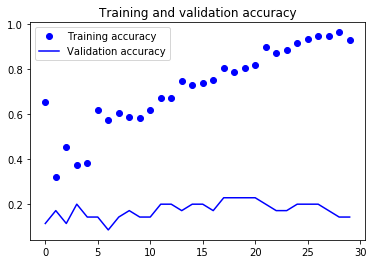

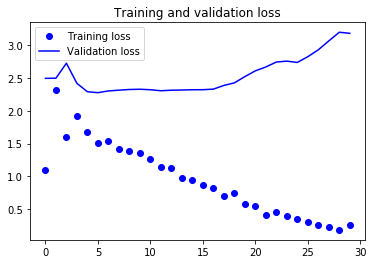

In [25]:
accuracy = food_train.history['acc']
val_accuracy = food_train.history['val_acc']
loss = food_train.history['loss']
val_loss = food_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
food_model.save("models/food_model_dropout.h5py")

# Predict Labels

In [15]:
predicted_classes = food_model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

# Correct Labels

Found 7 correct labels


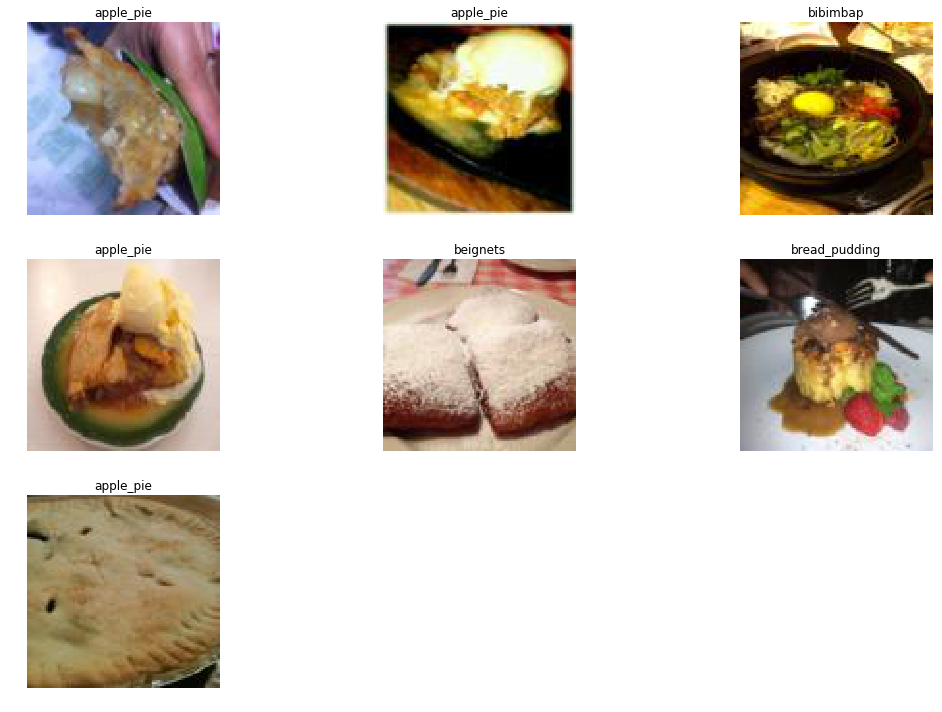

In [16]:
correct = np.where(predicted_classes==y_test)[0]
print("Found {0} correct labels".format(len(correct)))

plt.figure(figsize=(15, 10))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], interpolation='none')
    class_name = classes[predicted_classes[correct]]
    #plt.title("Predicted {0}, Class {1}".format(predicted_classes[correct], y_test[correct]))
    plt.title(class_name)
    plt.axis('off')

#plt.suptitle("Some of the correct labels")
plt.tight_layout()
plt.show()
plt.close()

# Incorrect Labels

Found 42 incorrect labels


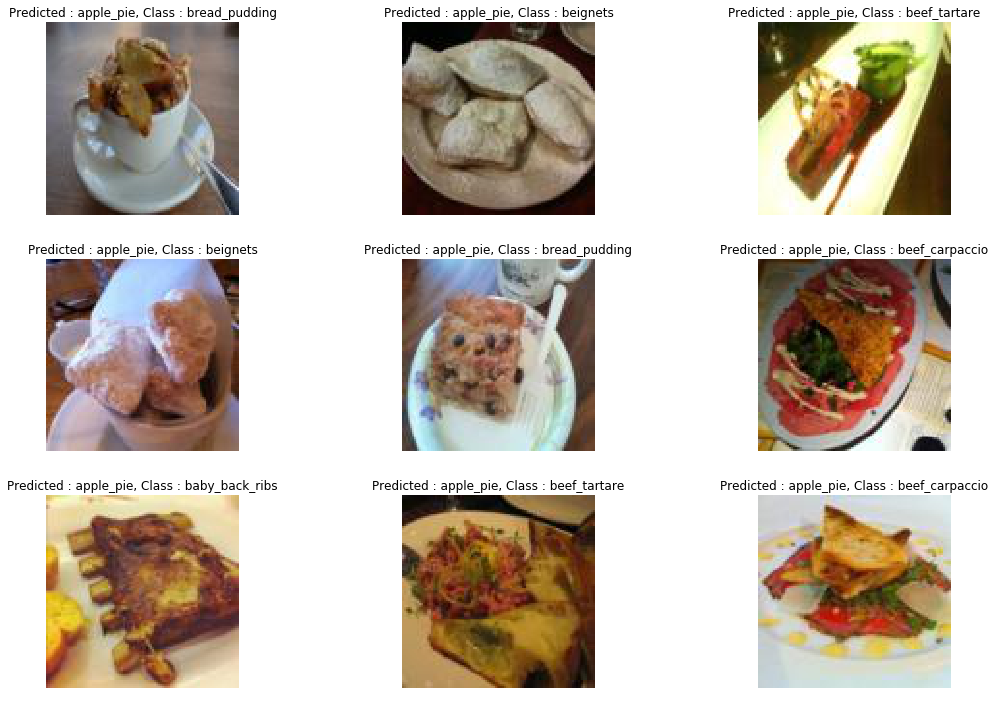

In [17]:
incorrect = np.where(predicted_classes != y_test)[0]
print("Found {0} incorrect labels".format(len(incorrect)))

plt.figure(figsize=(15, 10))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect], interpolation='none')
    class_name = classes[predicted_classes[incorrect]]
    correct_class_name = classes[y_test[incorrect]]
    plt.title("Predicted : {0}, Class : {1}".format(class_name, correct_class_name))
    #plt.title(class_name)
    plt.axis('off')

#plt.suptitle("Some of the incorrect labels")
plt.tight_layout()
plt.show()
plt.close()

# Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
target_names = [classes[i] for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                   precision    recall  f1-score   support

        apple_pie       0.10      0.80      0.17         5
   baby_back_ribs       0.00      0.00      0.00         5
          baklava       0.00      0.00      0.00         5
   beef_carpaccio       0.00      0.00      0.00         5
     beef_tartare       0.00      0.00      0.00         5
       beet_salad       0.00      0.00      0.00         5
         beignets       0.50      0.25      0.33         4
         bibimbap       1.00      0.20      0.33         5
    bread_pudding       0.50      0.20      0.29         5
breakfast_burrito       0.00      0.00      0.00         5

      avg / total       0.20      0.14      0.11        49



/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Predicted probabilities

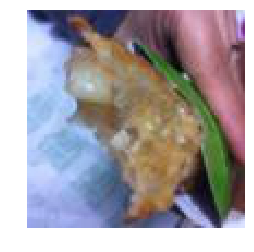

Correct Class :  apple_pie
{'breakfast_burrito': 0.285, 'baklava': 0.201, 'beignets': 0.151}



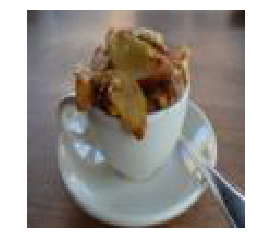

Correct Class :  bread_pudding
{'apple_pie': 0.22, 'baklava': 0.168, 'beef_tartare': 0.161}



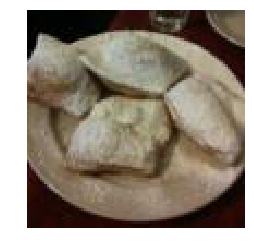

Correct Class :  beignets
{'apple_pie': 0.383, 'beignets': 0.328, 'beef_carpaccio': 0.092}



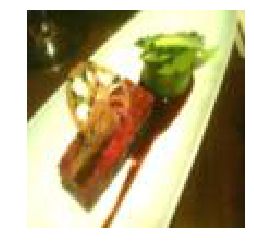

Correct Class :  beef_tartare
{'baklava': 0.325, 'beef_tartare': 0.296, 'beef_carpaccio': 0.137}



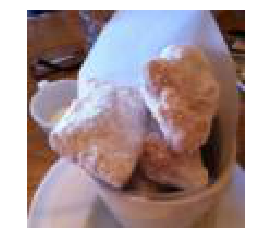

Correct Class :  beignets
{'beignets': 0.372, 'bread_pudding': 0.27, 'beef_tartare': 0.197}



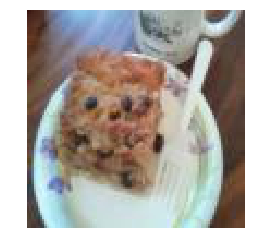

Correct Class :  bread_pudding
{'baklava': 0.304, 'beef_tartare': 0.236, 'apple_pie': 0.109}



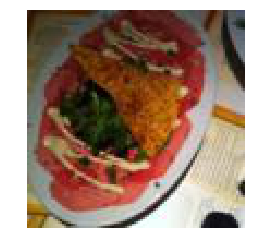

Correct Class :  beef_carpaccio
{'bread_pudding': 0.25, 'baklava': 0.179, 'beef_tartare': 0.174}



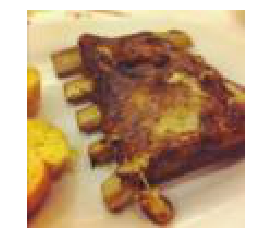

Correct Class :  baby_back_ribs
{'bread_pudding': 0.344, 'baklava': 0.259, 'beef_tartare': 0.138}



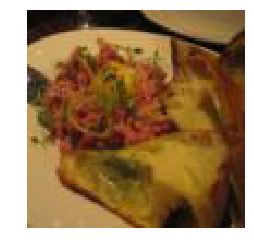

Correct Class :  beef_tartare
{'baklava': 0.206, 'bread_pudding': 0.202, 'beef_carpaccio': 0.132}



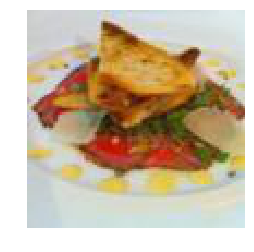

Correct Class :  beef_carpaccio
{'baklava': 0.355, 'bread_pudding': 0.214, 'beef_tartare': 0.194}



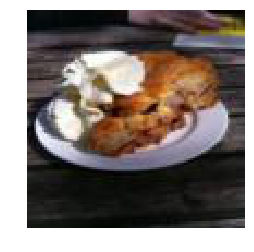

Correct Class :  apple_pie
{'beignets': 0.557, 'bibimbap': 0.191, 'apple_pie': 0.061}



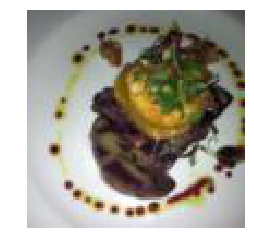

Correct Class :  beet_salad
{'beet_salad': 0.355, 'beef_tartare': 0.235, 'baklava': 0.214}



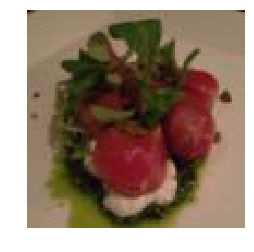

Correct Class :  beet_salad
{'baklava': 0.226, 'bread_pudding': 0.202, 'beef_tartare': 0.122}



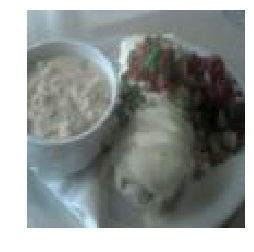

Correct Class :  breakfast_burrito
{'breakfast_burrito': 0.273, 'beignets': 0.187, 'baklava': 0.146}



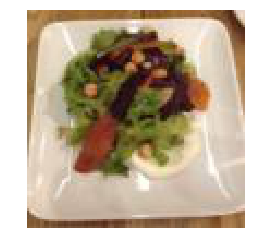

Correct Class :  beet_salad
{'baklava': 0.434, 'beef_tartare': 0.103, 'bread_pudding': 0.102}



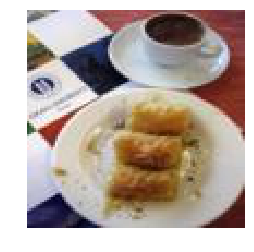

Correct Class :  baklava
{'beignets': 0.23, 'bread_pudding': 0.213, 'baklava': 0.175}



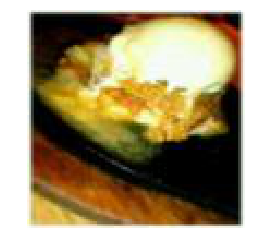

Correct Class :  apple_pie
{'bread_pudding': 0.299, 'baklava': 0.184, 'beef_tartare': 0.135}



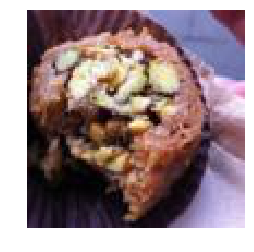

Correct Class :  baklava
{'beignets': 0.489, 'apple_pie': 0.139, 'beef_tartare': 0.123}



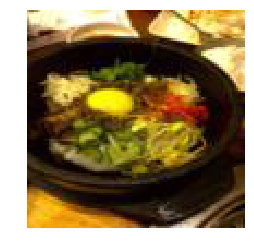

Correct Class :  bibimbap
{'bibimbap': 0.756, 'bread_pudding': 0.098, 'beef_tartare': 0.041}



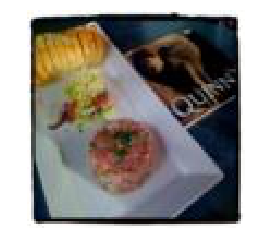

Correct Class :  beef_tartare
{'baklava': 0.648, 'breakfast_burrito': 0.067, 'beef_carpaccio': 0.06}



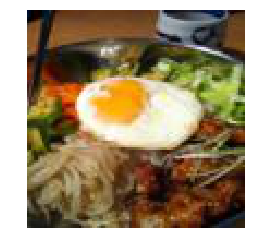

Correct Class :  bibimbap
{'bread_pudding': 0.26, 'bibimbap': 0.218, 'beignets': 0.165}



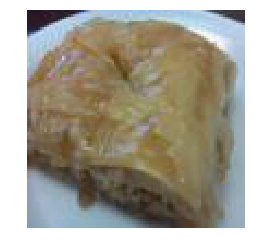

Correct Class :  baklava
{'baklava': 0.273, 'bread_pudding': 0.215, 'breakfast_burrito': 0.192}



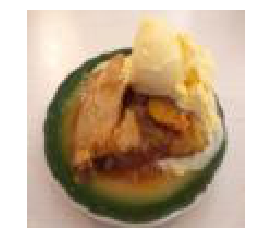

Correct Class :  apple_pie
{'bread_pudding': 0.373, 'baklava': 0.25, 'beef_tartare': 0.101}



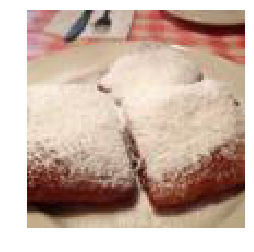

Correct Class :  beignets
{'beignets': 0.603, 'bread_pudding': 0.174, 'apple_pie': 0.119}



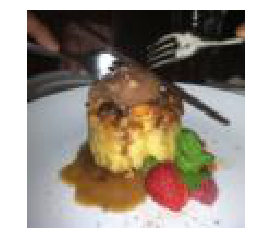

Correct Class :  bread_pudding
{'bread_pudding': 0.552, 'beef_tartare': 0.202, 'baklava': 0.076}



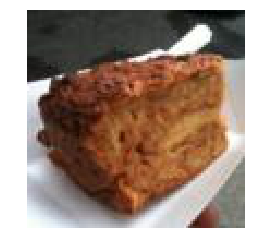

Correct Class :  bread_pudding
{'bread_pudding': 0.461, 'baklava': 0.171, 'beef_tartare': 0.092}



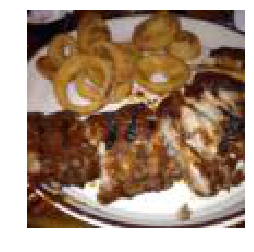

Correct Class :  baby_back_ribs
{'beef_tartare': 0.292, 'baklava': 0.255, 'beef_carpaccio': 0.126}



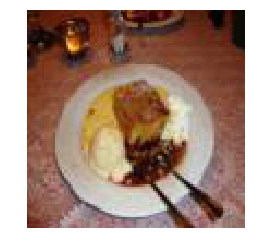

Correct Class :  bread_pudding
{'apple_pie': 0.243, 'baklava': 0.191, 'bread_pudding': 0.181}



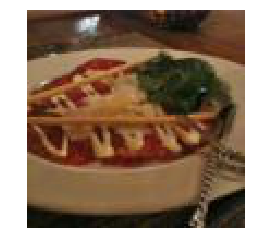

Correct Class :  beef_carpaccio
{'apple_pie': 0.205, 'baklava': 0.178, 'beef_carpaccio': 0.168}



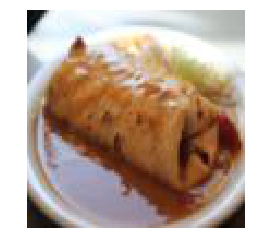

Correct Class :  breakfast_burrito
{'breakfast_burrito': 0.267, 'baklava': 0.188, 'bread_pudding': 0.172}



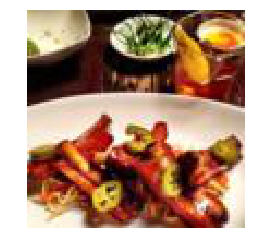

Correct Class :  baby_back_ribs
{'bread_pudding': 0.564, 'baklava': 0.206, 'beef_tartare': 0.06}



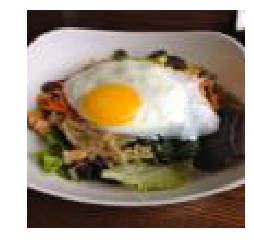

Correct Class :  bibimbap
{'apple_pie': 0.638, 'breakfast_burrito': 0.179, 'beignets': 0.047}



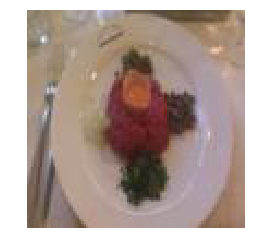

Correct Class :  beef_tartare
{'baklava': 0.272, 'beef_tartare': 0.17, 'bread_pudding': 0.15}



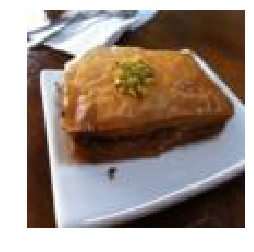

Correct Class :  baklava
{'apple_pie': 0.312, 'baklava': 0.272, 'breakfast_burrito': 0.144}



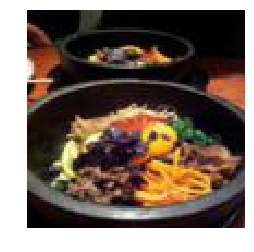

Correct Class :  bibimbap
{'beef_carpaccio': 0.677, 'bibimbap': 0.096, 'beef_tartare': 0.074}



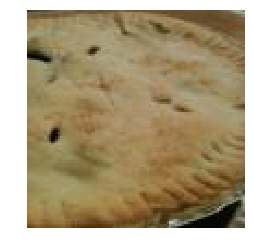

Correct Class :  apple_pie
{'bread_pudding': 0.28, 'apple_pie': 0.231, 'baklava': 0.159}



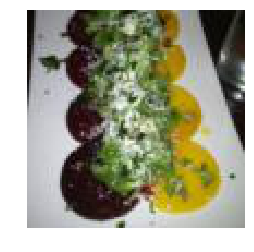

Correct Class :  beet_salad
{'bread_pudding': 0.394, 'baklava': 0.17, 'beef_tartare': 0.167}



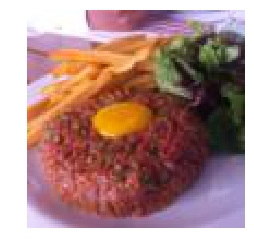

Correct Class :  beef_tartare
{'baklava': 0.323, 'bread_pudding': 0.217, 'beef_tartare': 0.152}



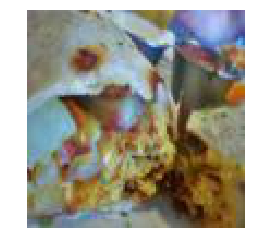

Correct Class :  breakfast_burrito
{'beignets': 0.249, 'baklava': 0.174, 'bread_pudding': 0.159}



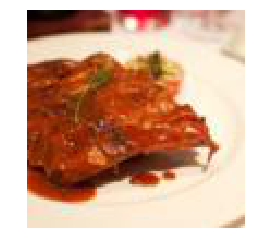

Correct Class :  baby_back_ribs
{'beef_tartare': 0.319, 'bread_pudding': 0.223, 'baklava': 0.159}



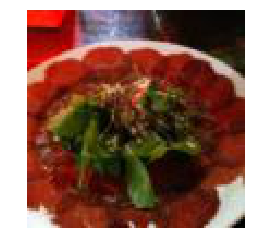

Correct Class :  beef_carpaccio
{'bread_pudding': 0.233, 'baby_back_ribs': 0.16, 'baklava': 0.129}



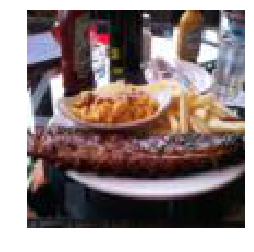

Correct Class :  baby_back_ribs
{'beignets': 0.264, 'apple_pie': 0.251, 'breakfast_burrito': 0.101}



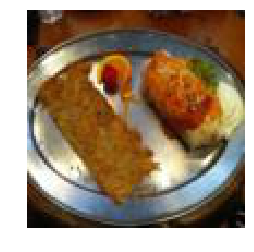

Correct Class :  breakfast_burrito
{'apple_pie': 0.22, 'baklava': 0.21, 'breakfast_burrito': 0.156}



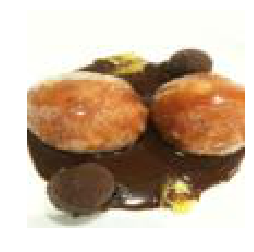

Correct Class :  beignets
{'beef_tartare': 0.33, 'bread_pudding': 0.32, 'baklava': 0.199}



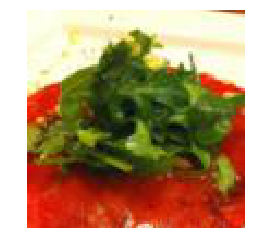

Correct Class :  beef_carpaccio
{'baklava': 0.201, 'baby_back_ribs': 0.176, 'beet_salad': 0.124}



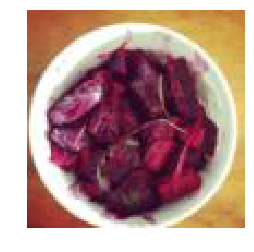

Correct Class :  beet_salad
{'beet_salad': 0.192, 'baklava': 0.167, 'beef_tartare': 0.164}



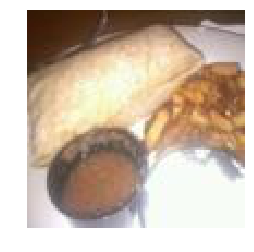

Correct Class :  breakfast_burrito
{'bread_pudding': 0.442, 'beignets': 0.323, 'beef_tartare': 0.084}



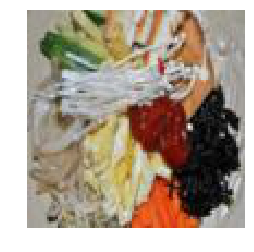

Correct Class :  bibimbap
{'beignets': 0.318, 'bread_pudding': 0.268, 'baklava': 0.121}



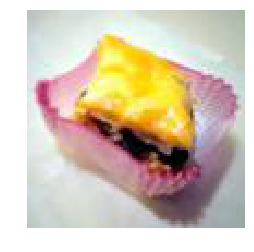

Correct Class :  baklava
{'baklava': 0.388, 'beef_tartare': 0.195, 'bread_pudding': 0.147}



In [19]:
predicted_probabilities = food_model.predict_proba(X_test)
predicted_probabilities = np.round(predicted_probabilities, decimals=3)

for i in range(len(y_test)):
    probs = list(predicted_probabilities[i])
    top3 = predicted_probabilities[i].argsort()[-3:][::-1]
    correct_class = classes[y_test[i]]
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.show()
    print('Correct Class : ', correct_class)
    top_prob_dict = dict()
    for j in range(len(top3)):
        top_prob_dict[classes[top3[j]]] = probs[top3[j]]
    print(top_prob_dict)
    print()